# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

The binomial distribution is appropriate because the data is discrete, and the distribution is ideally suited to represent the number of "successes" in a sequence of yes-no tests. Here, "improved" can be interpreted as "yes", and not improved as no.
The support is also non-negative integers, so that fits with the data.

Observed parameters are n (total 141 trials), k (107 people improved). The only unobserved parameter is p, which is the probability of getting better with the treatment.

Beta: we use a=b=1, so that it will be the same as the uniform distribution, since we do not know anything about the prior.

In [4]:
a = 1
b = 1
x = np.linspace(0,1,200)
prior = stats.beta.pdf(x, a, b)

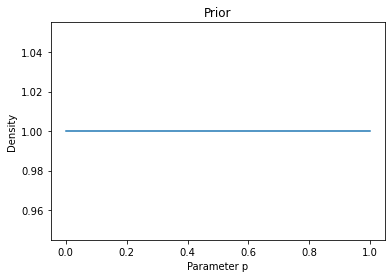

In [7]:
plt.plot(x, prior)
plt.title("Prior")
plt.xlabel("Parameter p")
plt.ylabel("Density")
plt.show()

Now we calculate the parameters for the posterior. Since we use a conjugate prior, we can simply use formulae. The posterior will also be a beta distribution: Beta(a+x, b+N-x). From the data, we have x = 107, N = 141. Prior: a=1, b=1. So the posterior is Beta(108, 35).

In [10]:
a_post = 108
b_post = 35
x_post = np.linspace(0,1,200)
posterior = stats.beta.pdf(x_post, a_post, b_post)

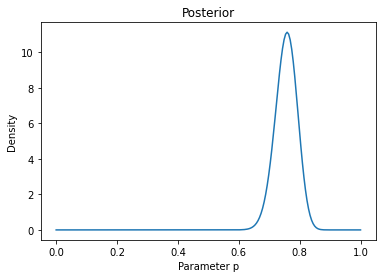

In [11]:
plt.plot(x_post, posterior)
plt.title("Posterior")
plt.xlabel("Parameter p")
plt.ylabel("Density")
plt.show()

This posterior tells us that the probability of having one's health improving after receiving the treatment is most likely around 0.75 (the highest point of the distribution), give or take around 0.1 (or 10%). More data will increase our certainty.

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* $n \in \mathbb{N}_0$ – the number of trials
* $\alpha, \beta \in \mathbb{R}^+$ – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

$$p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}$$

where $B$ is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [13]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import beta as beta_function, comb
    return comb(n, k) * beta_function(k + alpha, n - k + beta) / beta_function(alpha, beta)

In [20]:
#We use the same alpha and beta as computed in the posterior above.
#Assume that the new number of trials is 100
n_new = 100
sum1 = 0
#two thirds of 100 is 67. We calculate the probability of at least 67 getting better by summing the probability of 
#exactly 67 getting better, then 68, 69... This is equal to summing the pmf (discrete) from 67 onwards to 100
for i in range(67,101):
    sum1 += beta_binomial_pmf(i, n_new, 108, 35)

In [21]:
sum1

0.9411928617479145

In [24]:
#now do the same but with 75 or more patients:
sum2 = 0
for i in range(75,101):
    sum2 += beta_binomial_pmf(i, n_new, 108, 35)
sum2

0.5861639755029541

In [26]:
#overall, the expected number of patients who will improve if we treat 100 patients will be 
#the sum of patients get well * probability.
sum3 = 0
for i in range(0,101):
    sum3 += i*beta_binomial_pmf(i, n_new, 108, 35)
sum3

75.52447552446749

We see that the SIT treatment is expected to improve the health of 75.5 patients out of 100 new patients, with a 58% probability that at least 75 patients will improve, and 94% probability that at least two-thirds will improve. This means the treatment works quite well.